# 05 - Image Compression 🗜

In this challenge, you have to perform an image compression of the given picture of New York (`NewYork.jpg`).

To do so, we want to keep not all the possible colors, but only 4.

Thus, you have to perform a clustering algorithm, with K=4, and show the image with those only 4 colors.

> 🔦 **Hint:**: An image is composed of pixels. Each pixel is made of 3 channels: Red, Green, Blue (RGB). Those color levels are encoded on 8 bits, meaning they are in the range [0-255]. For example, a pixel with this RGB color : (0, 0, 255) will be a very strong blue pixel.

---

![](https://lisaspringercom.files.wordpress.com/2019/01/neil-thomas-736941-unsplash.jpg?w=1140)

---

In [31]:
# imports
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cluster import KMeans

In [32]:

# TO KEEP 4 colors out of 256
n_colors = 4

# TODO: Image compression

#def read_image():
#    image = cv2.imread("../NewYork.jpg")
#    return image

def load_image(infilename) :
    img = Image.open(infilename)
    img.load()
    data = np.asarray(img, dtype="int32")
    return data
                

In [33]:
# TODO: Image compression
# Image representation : a list of 3D points with R,G,B coordinates
# Purpose: to apply a Kmeans in the RGB 3D space with K=4

### https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow works well on float data (need to
# be in the range [0-1])
new_york = load_image("../NewYork.jpg")

new_york = np.array(new_york, dtype=np.float64) / 255 # normalisation des couleurs

new_york


array([[[0.33333333, 0.42352941, 0.63529412],
        [0.34117647, 0.43137255, 0.64313725],
        [0.34901961, 0.43921569, 0.65098039],
        ...,
        [0.46666667, 0.40392157, 0.58823529],
        [0.47058824, 0.40784314, 0.59215686],
        [0.51764706, 0.45490196, 0.63921569]],

       [[0.3254902 , 0.41568627, 0.62745098],
        [0.33333333, 0.42352941, 0.63529412],
        [0.34117647, 0.43137255, 0.64313725],
        ...,
        [0.51372549, 0.45098039, 0.63529412],
        [0.49411765, 0.43137255, 0.61568627],
        [0.54509804, 0.48235294, 0.66666667]],

       [[0.32156863, 0.41176471, 0.62352941],
        [0.33333333, 0.42352941, 0.63529412],
        [0.34509804, 0.43529412, 0.64705882],
        ...,
        [0.55294118, 0.49019608, 0.6745098 ],
        [0.52941176, 0.46666667, 0.65098039],
        [0.51372549, 0.45098039, 0.63529412]],

       ...,

       [[0.18823529, 0.16078431, 0.19215686],
        [0.16470588, 0.1372549 , 0.16862745],
        [0.17647059, 0

In [34]:
# TODO: Image compression
## reshape image into a (width * height, colors) array
print(f'new_york shape {new_york.shape}')
width, height, colors = tuple(new_york.shape)
img_arr = np.reshape(new_york, (width*height, colors))
img_arr.shape #1row par pixel (voir l'exo du challenge d'hier)

new_york shape (3264, 4896, 3)


(15980544, 3)

In [35]:
# TODO: Image compression
# sub-sample of image array of 1000 pixels -> train a Kmeans model
sub_image = shuffle(img_arr, random_state=42, n_samples=1000)
kmeans = KMeans(n_clusters=n_colors, random_state=42)
kmeans.fit(sub_image)

/home/michaelfaivre/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [36]:
# TODO: Image compression
# prédiction des 4 couleurs sur l'ensemble de l'Image
labels = kmeans.predict(img_arr)
print(f'labels: {labels}')

labels: [0 0 0 ... 1 1 1]


In [37]:
# rebuild image
def recreate_image(codebook, labels, width, height):
    return codebook[labels].reshape(width, height, -1)

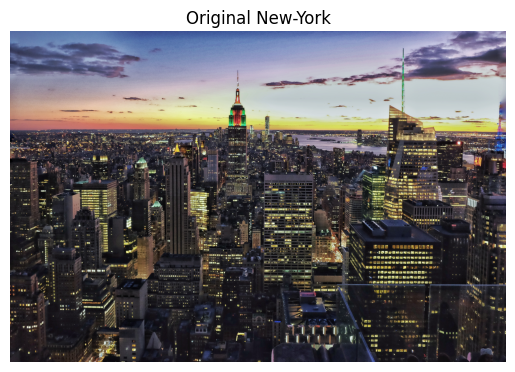

In [38]:
 # plot orginal NewYork
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original New-York")
plt.imshow(new_york)

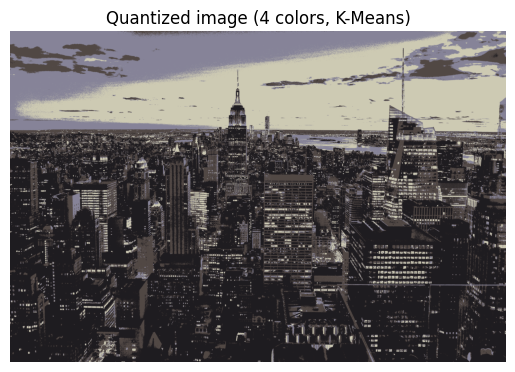

In [39]:
# plot rebuild image with 4 colors
plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, width, height))

### code issu de sklearn plot_color_quantization et un peu modifié